The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


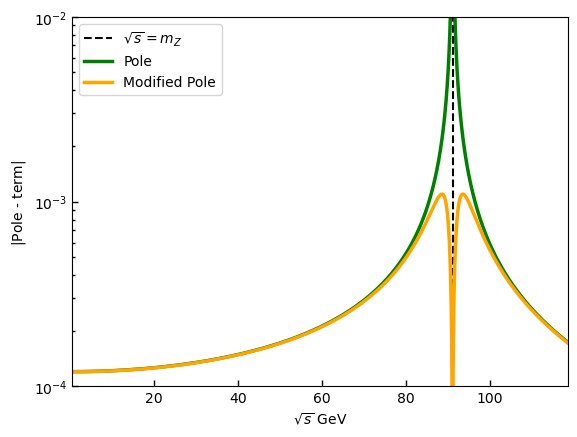

In [84]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 1 / 132.184
e = (4 * np.pi * alpha) ** 0.5
m_Z = 91.1876
m_W = 80.379
m_e = 0.511E-3
m_m = 105.66E-3
m_h = 125.1
Gam_Z = 2.4952
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e

def annoying1(s):
    return 1 / (m_Z ** 2 - s)

def annoying2(s):
    return ((m_Z ** 2 - Gam_Z ** 2 - s) / ((m_Z ** 2 - Gam_Z ** 2 - s) ** 2 + 4 * m_Z ** 2 * Gam_Z ** 2))

#def annoying3(s):
#    return  1 / (Gam_Z ** 4 / 16 + 0.5 * Gam_Z ** 2 * (m_Z ** 2 + s) + (m_Z ** 2 - s) ** 2)

def annoying4(s):
    return 1 / (m_Z ** 2 - s) ** 2        

def annoying5(s):
    return  1 / (Gam_Z ** 2 * m_Z ** 2 + (m_Z ** 2 - s) ** 2)

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def s_max(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4+(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def s_min(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4-(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

ml = m_m
t_min_fix = ml ** 2
t_max_fix = (m_h - ml) ** 2
s_min_fix = 4 * ml ** 2 
s_max_fix = m_h ** 2
t = t_min_fix + (t_max_fix - t_min_fix) * 0.1
xs = np.linspace(0, 1, 10000)
s = s_min(ml, t) + (s_max(ml, t) - s_min(ml, t)) * xs

fig, ax = plt.subplots()

plt.errorbar(np.sqrt(s), abs(annoying1(s)), yerr = None, linewidth = 2.5, color = 'green', label = 'Pole')
plt.errorbar(np.sqrt(s), abs(annoying2(s)), yerr = None, linewidth = 2.5, color = 'orange', label = 'Modified Pole')
plt.axvline(x = m_Z, linestyle = '--', color = 'black', label = r'$\sqrt{s}=m_{Z}$')
plt.yscale('log')
plt.ylim(10**-4, 10**-2)
plt.xlim(s_min(ml,t)**0.5, s_max(ml,t)**0.5)
#plt.xlim(m_Z-10*Gam_Z**0.5, m_Z+10*Gam_Z**0.5)
plt.xlabel(r'$\sqrt{s}$ GeV')
plt.ylabel(r'$|$Pole - term$|$')
ax.tick_params(which = 'major', direction='in', length=4, width=1)
ax.tick_params(which = 'minor', direction='in', length=2, width=1)
#ax.text(2, 1.2*10**-3, r'$t_{fixed}\approx$' +str(round(t))+' GeV$^{2}$', fontsize = 10)   
plt.legend()
#plt.savefig('Pole Squared', dpi = 2000)
plt.savefig('Pole.eps')
plt.show()

In [72]:
alpha = 1 / 132.184
e = (4 * np.pi * alpha) ** 0.5
m_Z = 91.1876
m_W = 80.379
m_e = 0.511E-3
m_m = 105.66E-3
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e

def estimate(err, m):
    return (np.sqrt(2) * e * err) / (4 * v * m * (cos - sin))

print(estimate(80*10**-11, m_m))

8.191519714837694e-12


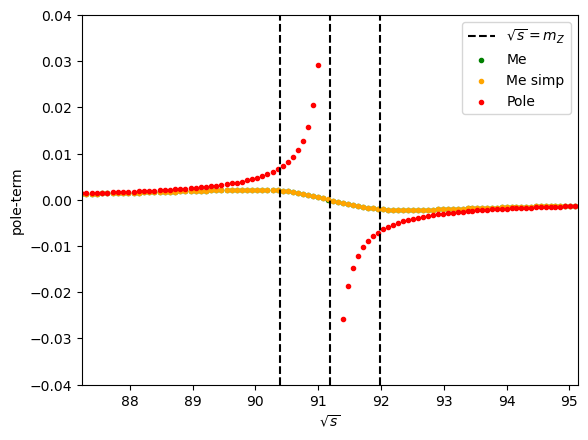

In [6]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 1 / 132.184
e = (4 * np.pi * alpha) ** 0.5
m_Z = 91.1876
m_W = 80.379
m_e = 0.511E-3
m_m = 105.66E-3
m_h = 125.1
Gam_Z = 2.4952
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e

def annoying2(s):
    return (m_Z ** 2 - Gam_Z ** 2 / 4 - s) / ((m_Z ** 2 - Gam_Z ** 2 / 4 - s) ** 2 + m_Z ** 2 * Gam_Z ** 2)

def annoying(s):
    return  1 / (m_Z ** 2 - s)

def annoying2mod(s):
    return (m_Z ** 2 - s) / ((m_Z ** 2 - s) ** 2 + m_Z ** 2 * Gam_Z ** 2)

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def s_max(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4+(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def s_min(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4-(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

ml = m_m
t_min_fix = ml ** 2
t_max_fix = (m_h - ml) ** 2
s_min_fix = 4 * ml ** 2 
s_max_fix = m_h ** 2
t = t_min_fix + (t_max_fix - t_min_fix) * 0.00001
xs = np.linspace(0, 1, 1000)
s = s_min(ml, t) + (s_max(ml, t) - s_min(ml, t)) * xs

plt.scatter(np.sqrt(s), annoying2(s), marker = '.', color = 'green', label = 'Me')
plt.scatter(np.sqrt(s), annoying2mod(s), marker = '.', color = 'orange', label = 'Me simp')
plt.scatter(np.sqrt(s), annoying(s), marker = '.', color = 'red', label = 'Pole')
plt.axvline(x = m_Z, linestyle = '--', color = 'black', label = r'$\sqrt{s}=m_{Z}$')
plt.axvline(x = m_Z-0.5*Gam_Z**0.5, linestyle = '--', color = 'black')
plt.axvline(x = m_Z+0.5*Gam_Z**0.5, linestyle = '--', color = 'black')
plt.ylim(-0.04, 0.04)
plt.xlim(m_Z-2.5*Gam_Z**0.5, m_Z+2.5*Gam_Z**0.5)
plt.xlabel(r'$\sqrt{s}$')
plt.ylabel('pole-term')
plt.legend()
plt.savefig('Pole', dpi = 2000)
plt.show()